# Data loading walk through

Thus far, the publically available datasets that I have been able to find on 17lands includes 3 different datasets. Game data and Draft data are probably most important

- Draft data
    - "Draft data for STX Premier Draft. One row per pick, with information about what they had picked previously, how the matches went, and the user's overall win rate. P1P1 data is missing due to it not being in the Arena logs."
- **Game data**
    - "Game-level data for STX Traditional Draft. Includes cards that were in the deck, in the opening hand (i.e. the one that was kept), or drawn later in the game. Cards that were drawn do not include cards that were in the opening hand."
- Replay data
    - "Turn-level data for STX Traditional Draft. Includes cards drawn, cards cast, creatures attacked with, damage dealt, etc. along with some game summary information."


This notebook depends on data to be found in /mtg_analysis/data/sets/stx/
Following cell loads the data there, assuming you wd is /code/

In [26]:
! pwd
! cd ../data; mkdir sets/stx;
! cd ../data/sets/stx; curl -O -J -L https://17lands-public.s3.amazonaws.com/analysis_data/game-data.STX.PremierDraft.tar.gz 
! cd ../data/sets/stx; curl -O -J -L https://17lands-public.s3.amazonaws.com/analysis_data/draft-data.STX.PremierDraft.tar.gz
! cd ../data/sets/stx; curl -O -J -L https://17lands-public.s3.amazonaws.com/analysis_data/replay-data.STX.PremierDraft.202105.tar.gz
    

/Users/bren/Desktop/Bren/projects/mtg_analysis/code
mkdir: sets/stx: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  141M  100  141M    0     0  9931k      0  0:00:14  0:00:14 --:--:--  9.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  190M  100  190M    0     0  9356k      0  0:00:20  0:00:20 --:--:-- 9217k17  0:00:03 9542k


In [16]:
import os 
import numpy as np
import pandas as pd # using dataframes as the main way to interface with data

DATA_DIR = "../data/sets/stx/"

In [20]:
data_file = os.listdir(DATA_DIR)[0]
data_file = os.path.join(DATA_DIR, data_file)
print(data_file)

../data/sets/stx/game-data.STX.PremierDraft.tar.gz


### Loading Game Data

In [18]:
%time data = pd.read_csv(data_file)

<decorator-gen-54>:2: DtypeWarning: Columns (10,15) have mixed types.Specify dtype option on import or set low_memory=False.


CPU times: user 56.3 s, sys: 14.1 s, total: 1min 10s
Wall time: 1min 47s


### Previewing Game data:

In [29]:
data.dropna(axis=0, inplace=True) # last row was na, just getting rid of any other rows that also could be
print(f'Data shape: {data.shape}')
print(f'Whats in the cols? {list(data.columns)}')
data.head()

Data shape: (463435, 1388)
Whats in the cols? ['game_data_public.STX.PremierDraft.csv', 'user_n_games_bucket', 'draft_id', 'build_index', 'draft_time', 'expansion', 'event_type', 'game_number', 'rank', 'opp_rank', 'on_play', 'num_mulligans', 'opp_num_mulligans', 'opp_colors', 'num_turns', 'won', 'opening_hand_Abundant Harvest', 'opening_hand_Academic Dispute', 'opening_hand_Academic Probation', 'opening_hand_Access Tunnel', 'opening_hand_Accomplished Alchemist', 'opening_hand_Adventurous Impulse', 'opening_hand_Aether Helix', 'opening_hand_Ageless Guardian', 'opening_hand_Agonizing Remorse', 'opening_hand_Approach of the Second Sun', 'opening_hand_Arcane Subtraction', 'opening_hand_Archmage Emeritus', 'opening_hand_Archway Commons', 'opening_hand_Ardent Dustspeaker', 'opening_hand_Arrogant Poet', 'opening_hand_Augmenter Pugilist', 'opening_hand_Baleful Mastery', 'opening_hand_Basic Conjuration', 'opening_hand_Bayou Groff', 'opening_hand_Beaming Defiance', 'opening_hand_Beledros Witherb

,game_data_public.STX.PremierDraft.csv,user_n_games_bucket,draft_id,build_index,draft_time,expansion,event_type,game_number,rank,opp_rank,...,sideboard_Waterfall Aerialist,sideboard_Weather the Storm,sideboard_Whirlwind Denial,sideboard_Witherbloom Apprentice,sideboard_Witherbloom Campus,sideboard_Witherbloom Command,sideboard_Witherbloom Pledgemage,sideboard_Wormhole Serpent,sideboard_Zephyr Boots,"sideboard_Zimone, Quandrix Prodigy"
0,0.52,100.0,3c8a8479507f4ad88990e6ada2c9d0e8,0.0,2021-05-07 03:21:49,STX,PremierDraft,1.0,Platinum-4-0-0-0,Platinum-3-0-0-None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.52,100.0,3c8a8479507f4ad88990e6ada2c9d0e8,0.0,2021-05-07 03:21:49,STX,PremierDraft,1.0,Platinum-4-0-0-0,Platinum-1-0-0-None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.52,100.0,3c8a8479507f4ad88990e6ada2c9d0e8,0.0,2021-05-07 03:21:49,STX,PremierDraft,1.0,Platinum-4-0-0-0,Platinum-4-0-0-None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.52,100.0,0d3260a1bcee4ddf8d6a5e649d7cd436,0.0,2021-05-05 04:11:17,STX,PremierDraft,1.0,Platinum-4-0-0-1,Platinum-4-0-0-None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.52,100.0,0d3260a1bcee4ddf8d6a5e649d7cd436,0.0,2021-05-05 04:11:17,STX,PremierDraft,1.0,Platinum-4-0-0-0,Platinum-4-0-0-None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Here we can kind of see that each row is one instance of a game, (ie. there can be multiple rows with the same `draft_id` because each time they play they will have a different instance)

The meat of the data are 4 vectors of length S concatenated, where S is the set size. These 4 vectors represent counts of cards' presence in (1) the opening hand (2) drawn in game (3) overall deck (4) sideboard.

Some of the natural "annotations" include player rank, op rank, whether player won or not, number of turns, mulligans etc.

In [30]:
wins = data.won
open_hands = data.iloc[:, ["opening_hand" in col for col in data.columns]]

## Logisitic regression prediction

In [47]:
import sklearn.linear_model
import matplotlib.pyplot as plt

In [33]:
model = sklearn.linear_model.LogisticRegression()

In [41]:
lg = model.fit(open_hands.to_numpy(), wins.to_numpy().astype(int))

/Users/bren/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
preds= lg.predict_proba(open_hands.to_numpy())

In [50]:
%matplotlib inline

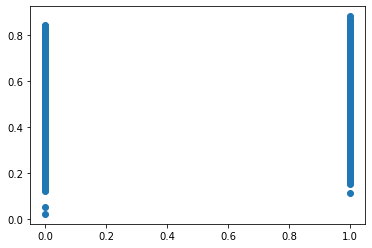

In [51]:
plt.scatter(wins.to_numpy().astype(int), preds[:,1])

In [52]:
import seaborn as sns

In [63]:
df = pd.DataFrame(preds[:,1], wins)
sns.violinplot(x=preds[:,1], y=wins.to_numpy().astype(int))


KeyboardInterrupt: 

In [ ]:
import sklearn.manifold
reduce = sklearn.manifold.TSNE()
decks = data.iloc[:, ["deck" in col for col in data.columns]]z
decks
tsne_out = reduce.fit_transform(decks.to_numpy())

In [67]:
tsne_out

sklearn.manifold._t_sne.TSNE